In [1]:
from commonfunctions import *
from skimage.exposure import histogram
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.morphology import binary_opening, binary_erosion, binary_closing, thin
from skimage.filters import gaussian as gaussian_filter
import cv2 as cv
import os
from skimage import img_as_ubyte
import functools 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [209]:
width = 60
height = 60

class character:
    def __init__(self, char, template):
        self.char = char
        self.template = cv.resize(cv.imread(template,cv.IMREAD_GRAYSCALE), (60, 60), interpolation = cv.INTER_AREA)
        self.col_sum = np.zeros(shape=(height,width))
        self.corr = 0
        
database_characters = []

alf = character("أ", 'charImages/alf.jpg')
alf2 = character("أ", 'charImages/alf2.png')
alf3 = character("أ", 'charImages/alf3.jpg')
baa = character("ب", "charImages/ba'.jpg")
baa2 = character("ب", "charImages/ba'2.jpg")
baa3 = character("ب", "charImages/ba'3.jpg")
baa4 = character("ب", "charImages/ba'4.jpg")
gem = character("ج", 'charImages/gem.jpg')
dal = character("د", 'charImages/dal.jpg')
dal2 = character("د", 'charImages/dal2.jpg')
raa = character("ر", "charImages/ra'.jpg")
raa2 = character("ر", "charImages/ra'2.png")
raa3 = character("ر", "charImages/ra'3.jpg")
raa4 = character("ر", "charImages/ra'4.jpg")
zay = character("ز", "charImages/zay.jpg")
sen = character("س", 'charImages/sen.jpg')
sad = character("ص", 'charImages/sad.jpg')
sad2 = character("ص", 'charImages/sad2.jpg')
sad3 = character("ص", 'charImages/sad3.jpg')
taa = character("ط", 'charImages/taa.jpg')
taa2 = character("ط", 'charImages/taa2.jpg')
ain = character("ع", 'charImages/ain.png')
ain2 = character("ع", 'charImages/ain2.jpg')
faa = character("ف", "charImages/fa'.jpg")
faa2 = character("ف", "charImages/fa'2.png")
faa3 = character("ف", "charImages/fa'3.jpg")
faa4 = character("ف", "charImages/fa'4.jpg")
qaf = character("ق", 'charImages/qaf.jpg')
qaf2 = character("ق", 'charImages/qaf2.jpg')
qaf3 = character("ق", 'charImages/qaf3.jpg')
qaf4 = character("ق", 'charImages/qaf4.jpg')
qaf5 = character("ق", 'charImages/qaf5.jpg')
lam = character("ل", 'charImages/lam.jpg')
lam2 = character("ل", 'charImages/lam2.jpg')
mem = character("م", 'charImages/mem.jpg')
mem2 = character("م", 'charImages/mem2.jpg')
noon = character("ن", 'charImages/noon.png')
noon2 = character("ن", 'charImages/noon2.png')
noon3 = character("ن", 'charImages/noon3.jpg')
haa = character("ه", "charImages/ha'.jpg")
haa2 = character("ه", "charImages/ha'2.png")
haa3 = character("ه", "charImages/ha'3.png")
waw = character("و", 'charImages/waw.jpg')
waw2 = character("و", 'charImages/waw2.jpg')
yaa = character("ى", "charImages/ya'.jpg")
yaa2 = character("ى", "charImages/ya'2.jpg")
zero = character("0", 'charImages/0.jpg')
one = character("1", 'charImages/1.jpg')
one2 = character("1", 'charImages/11.jpg')
one3 = character("1", 'charImages/111.jpg')
two = character("2", 'charImages/2.jpg')
two2 = character("2", 'charImages/22.jpg')
three = character("3", 'charImages/3.jpg')
three2 = character("3", 'charImages/33.jpg')
four = character("4", 'charImages/4.jpg')
four2 = character("4", 'charImages/44.jpg')
five = character("5", 'charImages/5.jpg')
five2 = character("5", 'charImages/55.jpg')
six = character("6", 'charImages/6.jpg')
seven = character("7", 'charImages/7.jpg')
seven2 = character("7", 'charImages/77.jpg')
eight = character("8", 'charImages/8.jpg')
nine = character("9", 'charImages/9.jpg')

database_characters.append(alf)
database_characters.append(alf2)
database_characters.append(alf3)
database_characters.append(baa)
database_characters.append(baa2)
database_characters.append(baa3)
database_characters.append(baa4)
database_characters.append(gem)
database_characters.append(dal)
database_characters.append(dal2)
database_characters.append(raa)
database_characters.append(raa2)
database_characters.append(raa3)
database_characters.append(raa4)
database_characters.append(zay)
database_characters.append(sen)
database_characters.append(sad)
database_characters.append(sad2)
database_characters.append(sad3)
database_characters.append(taa)
database_characters.append(taa2)
database_characters.append(ain)
database_characters.append(ain2)
database_characters.append(faa)
database_characters.append(faa2)
database_characters.append(faa3)
database_characters.append(faa4)
database_characters.append(qaf)
database_characters.append(qaf2)
database_characters.append(qaf3)
database_characters.append(qaf4)
database_characters.append(qaf5)
database_characters.append(lam)
database_characters.append(lam2)
database_characters.append(mem)
database_characters.append(mem2)
database_characters.append(noon)
database_characters.append(noon2)
database_characters.append(noon3)
database_characters.append(haa)
database_characters.append(haa2)
database_characters.append(haa3)
database_characters.append(waw)
database_characters.append(waw2)
database_characters.append(yaa)
database_characters.append(yaa2)
database_characters.append(one)
database_characters.append(one2)
database_characters.append(one3)
database_characters.append(two)
database_characters.append(two2)
database_characters.append(three)
database_characters.append(three2)
database_characters.append(four)
database_characters.append(four2)
database_characters.append(five)
database_characters.append(five2)
database_characters.append(six)
database_characters.append(seven)
database_characters.append(seven2)
database_characters.append(eight)
database_characters.append(nine)

In [4]:
def getSimilarity(img1, img2):
    dim = (60,60)
    img1 = cv.GaussianBlur(img1,(19,19),0)
    img2 = cv.GaussianBlur(img2,(19,19),0)
    img1 = cv.resize(img1, dim, interpolation = cv.INTER_AREA)
    img2 = cv.resize(img2, dim, interpolation = cv.INTER_AREA)
    ret2,img1 = cv.threshold(img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    ret2,img2 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    sim = img1 - img2
    sim = sim * sim
    sim = np.sum(sim)
    sim = np.sqrt(sim)
    return sim

In [215]:
dim = (60, 60)
class characterContour:
    def __init__(self, char, template):
        self.char = char
        self.template = cv.resize(template, dim, interpolation = cv.INTER_AREA)
        self.col_sum = np.zeros(shape=(height,width))
        self.corr = 0

def detectChar(Unk_char):
    r = 500000000000
    curr_r = 500000000000
    for j in database_characters:
        curr_r = similarity = getSimilarity(Unk_char.template,j.template)
        if curr_r < r:
            Unk_char.char = j.char
            r = curr_r
    return Unk_char.char

def movePointBy90(hieght, width, i, j):
    iNew = -j + width - 1
    jNew = i
    return int(iNew), int(jNew)

def rotateMatrix90(mat):
    image2 = np.zeros([mat.shape[1], mat.shape[0]])
    for i in range(mat.shape[0]-1):
        for j in range(mat.shape[1]-1):
            newPoint = movePointBy90(mat.shape[0], mat.shape[1], i, j)
            image2[newPoint[0], newPoint[1]]=mat[i,j]
    return image2
def rotateMatrixNTimes(mat, n=1):
    for i in range(0, n):
        mat = rotateMatrix90(mat)
    return mat


def checkRange(width , Xmin,Xmax):
    minWidth , maxWidth = width * .45 , width *.55
    return not( (minWidth < Xmin and Xmin < maxWidth) and (minWidth < Xmax and Xmax < maxWidth))
    

def getChars(img):
    imgRows, imgCols = img.shape
    charTexts = []
    contours = find_contours(img, 0.8)
    with_boxes  = np.zeros(img.shape, dtype=float)
    bounding_boxes = []
    for contour in contours:
        Xmin = int(np.min(contour[:,1]))
        Xmax = int(np.max(contour[:,1]))
        Ymin = int(np.min(contour[:,0]))
        Ymax = int(np.max(contour[:,0]))
        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    bounding_boxes.sort(key=lambda x: x[0])
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        absWidthDifference = abs(Ymax-Ymin)
        if(absWidthDifference == 0):
            absWidthDifference = 1
        
        if(abs(Xmax-Xmin)/absWidthDifference >= 0.12 and abs(Xmax-Xmin)/absWidthDifference <= 2.9 and abs(Ymax-Ymin) > 14 and checkRange(imgCols, Xmin, Xmax)):
            rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=with_boxes.shape)
            with_boxes[rr, cc] = 1 #set color black
            char = img[rr,cc]
            char = rotateMatrixNTimes(char, 3)
            char = np.fliplr(char)
            rows, cols = char.shape
            char = char[1:rows-1,1:cols-1] # Cancel black borders (thickness is only 1 pixel)
            char = characterContour("Unknown", img_as_ubyte(char))
            textChar = detectChar(char)
            charTexts.append(textChar)
            #show_images([char.template], ["Char"])
    charTexts.reverse()
    return charTexts


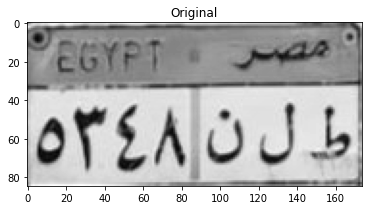

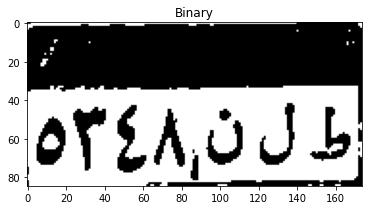

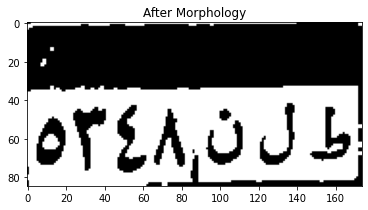

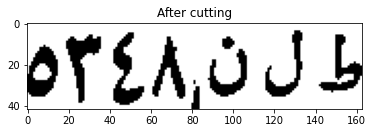

['ط', 'ل', 'ن', '8', '4', '3', '5']


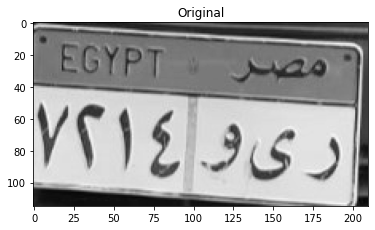

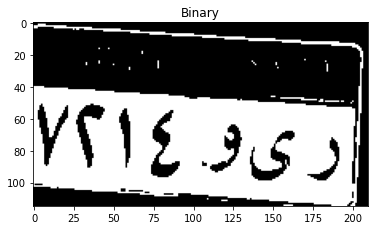

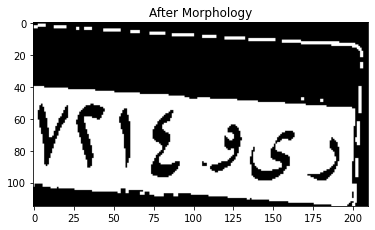

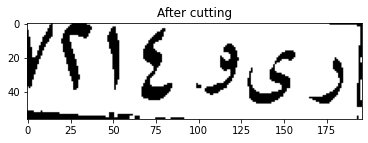

['ل', 'ر', 'ى', 'و', '4', '1', '2', 'ص', 'ص']


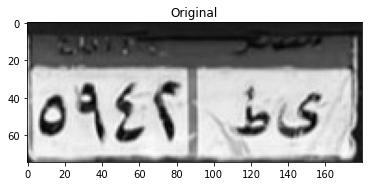

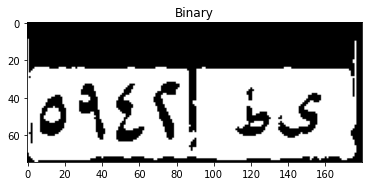

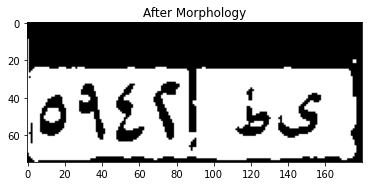

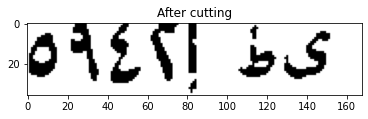

['ى', 'ط', '2', '4', '9', '5']


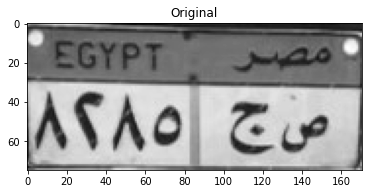

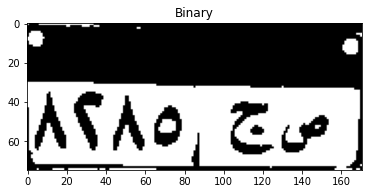

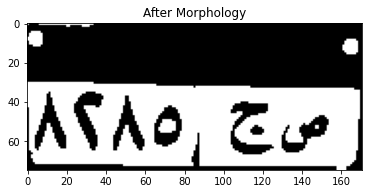

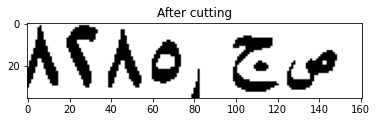

['ص', 'ج', '5', '8', '2', '8']


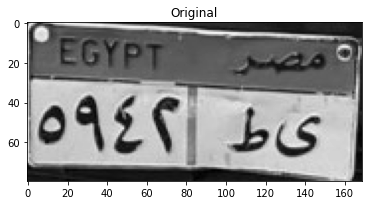

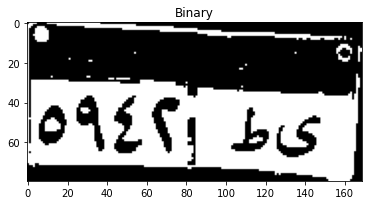

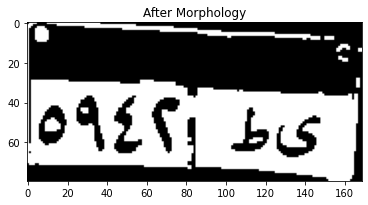

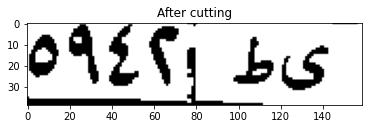

['ى', 'ط', '2', '4', '9', '5']


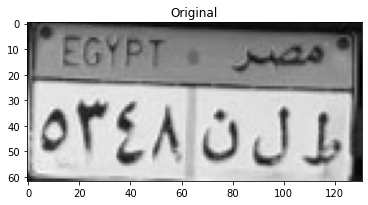

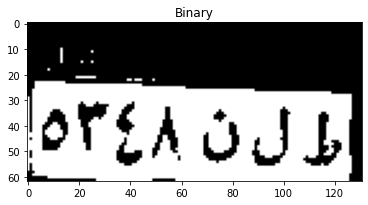

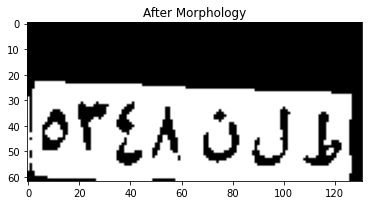

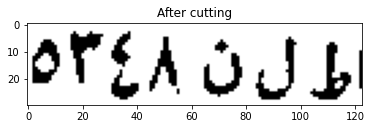

['ط', 'ل', 'ب', 'ه', '3', '5']


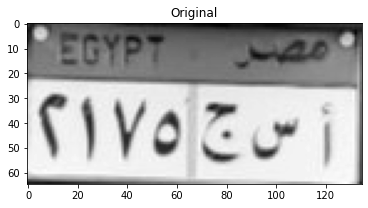

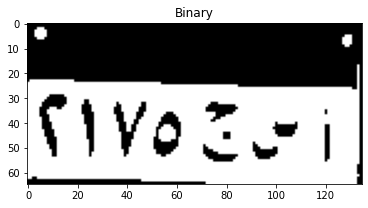

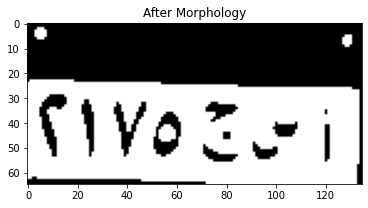

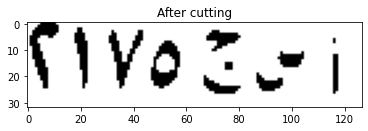

['أ', '5', '7', '1', '2']


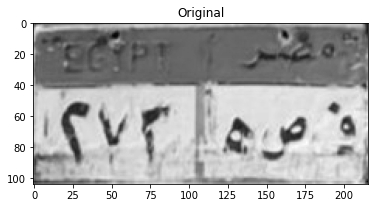

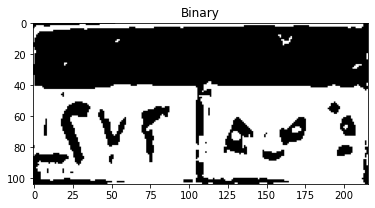

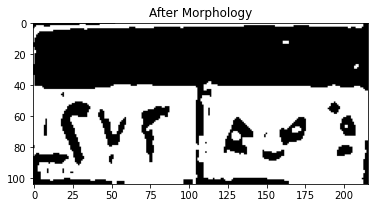

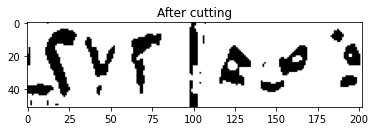

['ص', 'ق', '3', '7', '2']


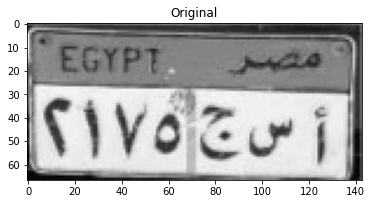

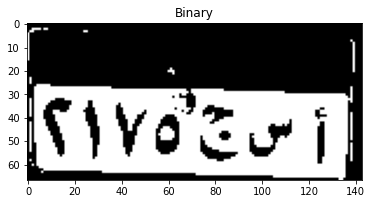

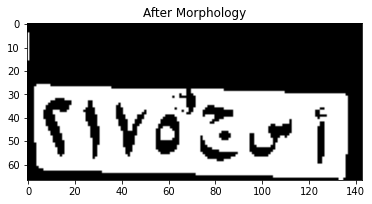

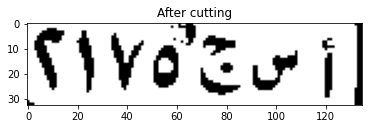

['أ', 'س', '5', '7', '1', '2']


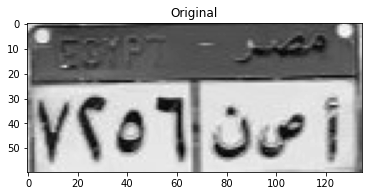

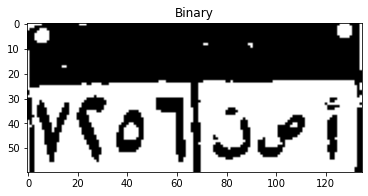

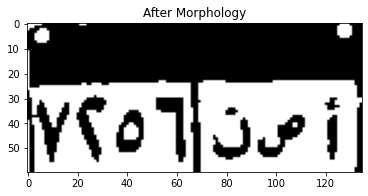

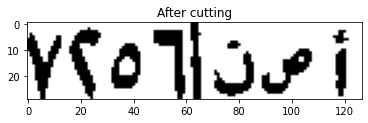

['أ', 'ص', 'ن', '6', '5', '2', '6', '7']


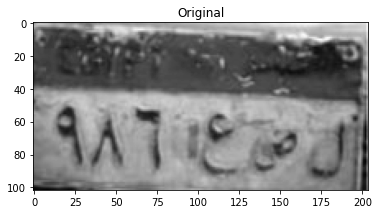

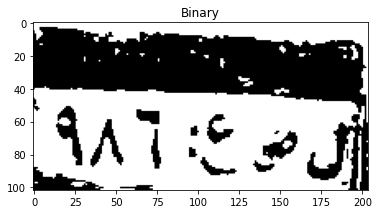

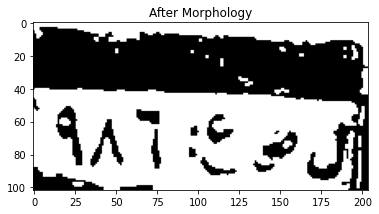

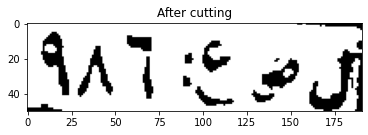

['ص', 'ص', 'ص', 'ع', '4', '8', '9']


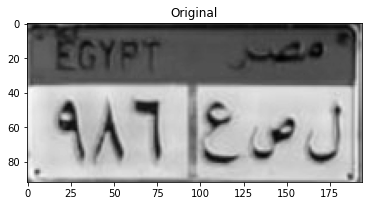

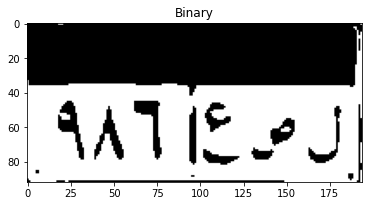

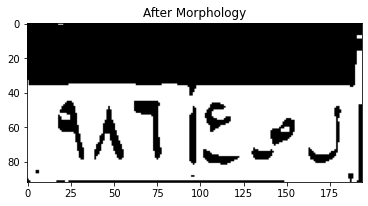

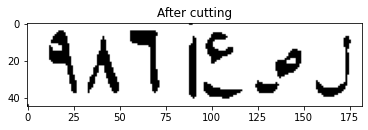

['ل', 'ص', 'ع', '6', '8', '9']


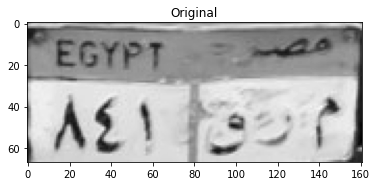

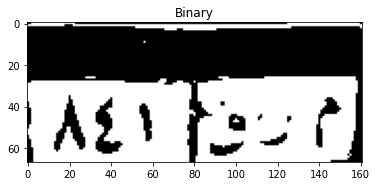

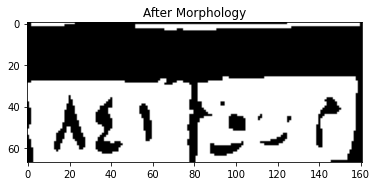

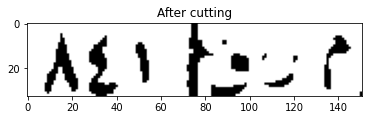

['م', '1', '4', '8']


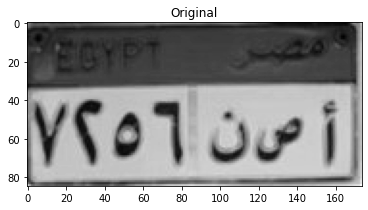

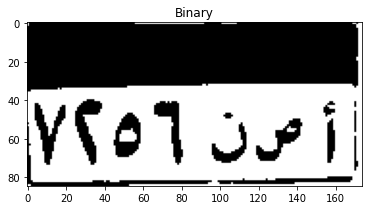

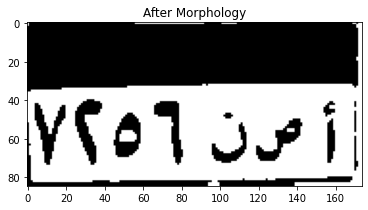

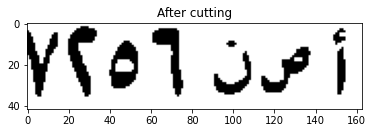

['أ', 'ص', 'ن', '6', '5', '2', '7']


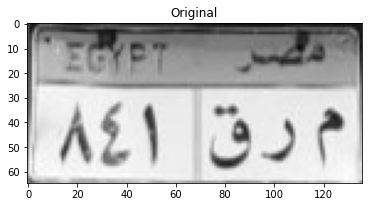

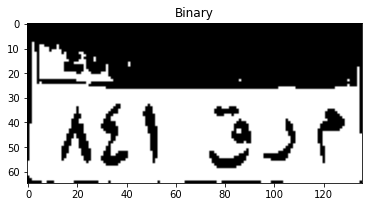

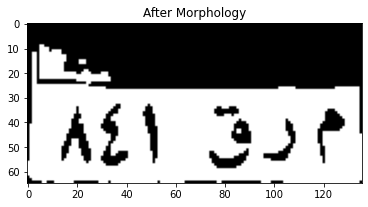

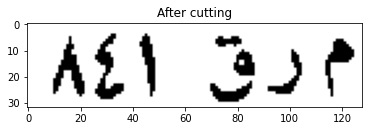

['م', 'ر', '1', '4', '8']


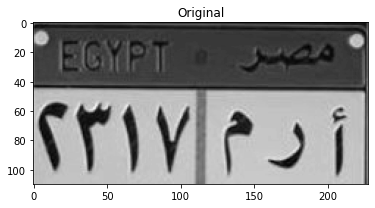

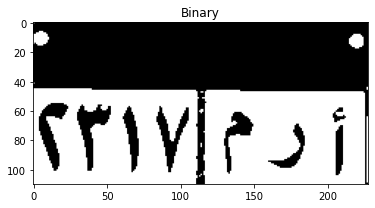

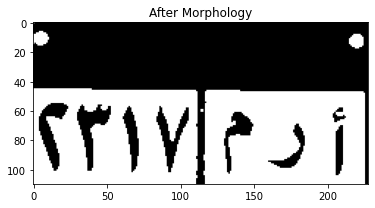

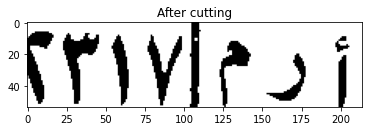

['أ', 'ر', 'م', '7', '1', '3', '2']


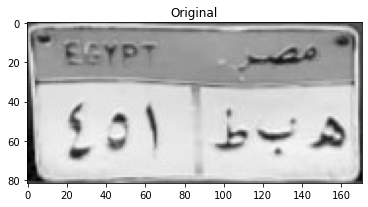

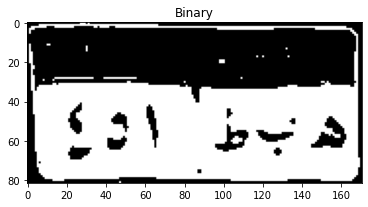

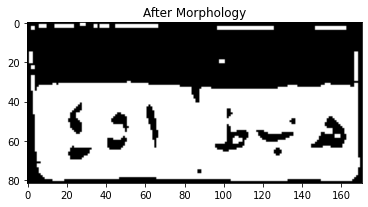

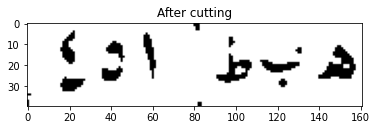

['ه', '1', '4']


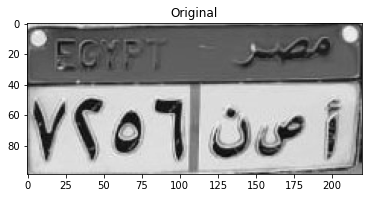

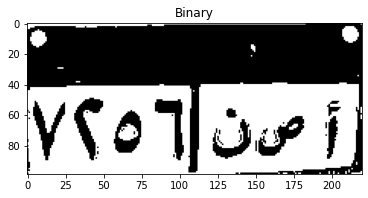

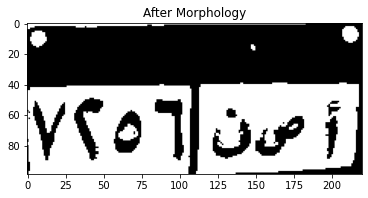

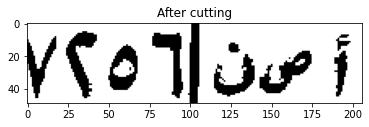

['أ', 'ص', 'ن', '6', '5', '2', '7']


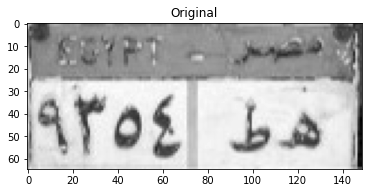

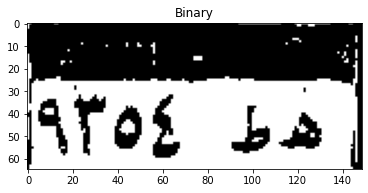

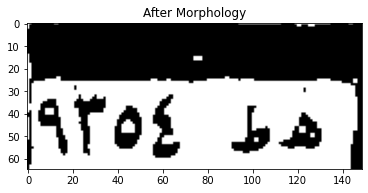

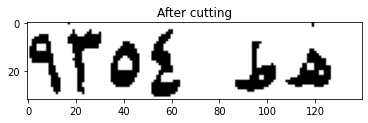

['ه', 'ط', '4', '5', '3', '9']


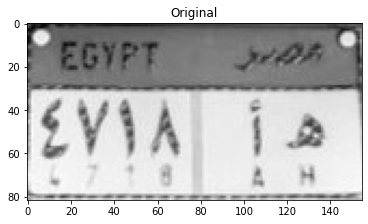

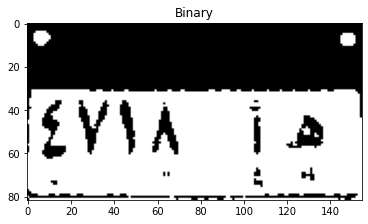

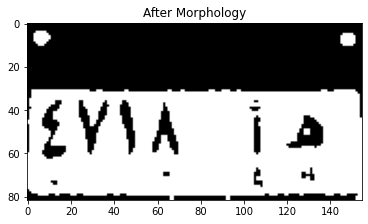

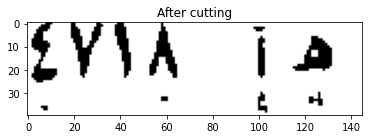

['ه', 'أ', '8', '1', '7', '4']


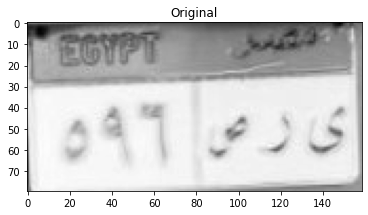

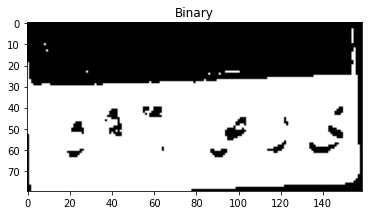

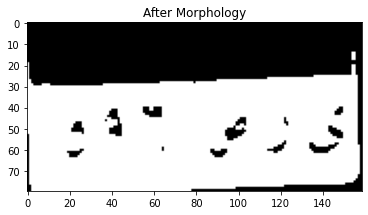

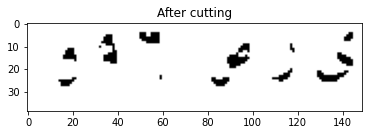

[]


In [218]:
n = 0
page = 3
limit = 20
for i in os.listdir('plates_dataset/'):
    n += 1
    if (n >= page*limit):
        image = (rgb2gray(io.imread("plates_dataset/" + i)) * 255).astype("uint8")
        show_images([image], ["Original"])
        image = cv.threshold(image, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
        show_images([image], ["Binary"])
        x,y = image.shape
        structuringEl = np.ones((2, 2))        
        image = binary_opening(image, structuringEl)
        show_images([image], ["After Morphology"])
        image = image[int(x//2.2):x-int(x//15),int(y//30):y-int(y//29)]
        show_images([image], ["After cutting"])
        charText = getChars(image)
        print(charText)
    if n == (page+1)*limit:
        break

# No. errors = 9 out of 19  => Page 0
# No. errors = 5 out of 20  => Page 1
# No. errors = 13 out of 20 => Page 2
# No. errors = 11 out of 21 => Page 3
# Success Percentage = 52.5%, Error percentage = 47.5%


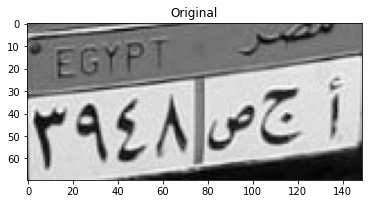

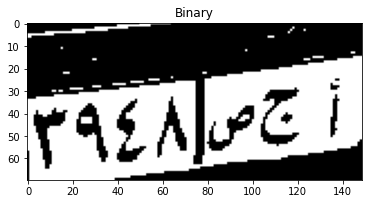

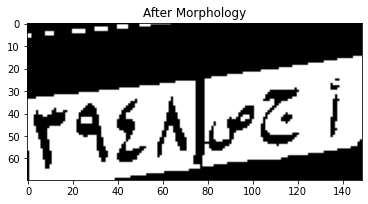

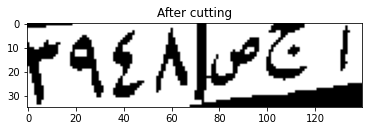

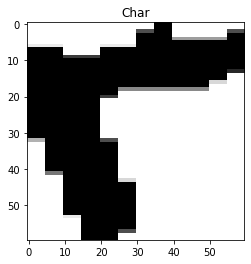

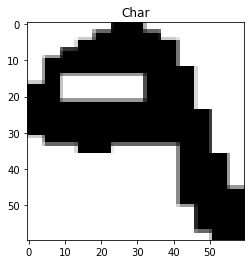

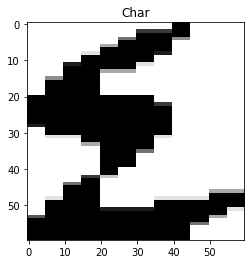

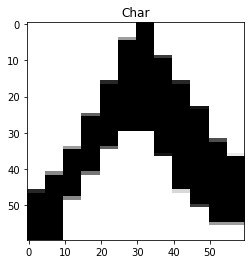

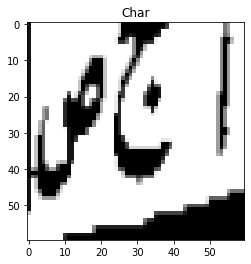

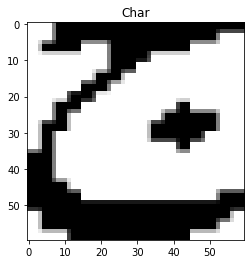

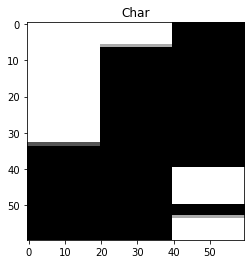

['أ', 'ج', 'ب', '8', '4', '9', '3']


In [213]:
image = (rgb2gray(io.imread("plates_dataset/img10.jpg")) * 255).astype("uint8")
show_images([image], ["Original"])
image = cv.threshold(image, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
show_images([image], ["Binary"])
x,y = image.shape
structuringEl = np.ones((2, 2))        
image = binary_opening(image, structuringEl)
show_images([image], ["After Morphology"])
image = image[int(x//2.2):x-int(x//15),int(y//30):y-int(y//29)]
show_images([image], ["After cutting"])
charText = getChars(image)
print(charText)